In [1]:
!pip install kagglehub

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("kundanbedmutha/instagram-analytics-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.04M/1.04M [00:00<00:00, 1.12MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kundanbedmutha/instagram-analytics-dataset/versions/1


In [3]:
import os
os.listdir(path)

['Instagram_Analytics.csv']

In [4]:
df = pd.read_csv(f"{path}/Instagram_Analytics.csv")

# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_id           29999 non-null  object 
 1   upload_date       29999 non-null  object 
 2   media_type        29999 non-null  object 
 3   likes             29999 non-null  int64  
 4   comments          29999 non-null  int64  
 5   shares            29999 non-null  int64  
 6   saves             29999 non-null  int64  
 7   reach             29999 non-null  int64  
 8   impressions       29999 non-null  int64  
 9   caption_length    29999 non-null  int64  
 10  hashtags_count    29999 non-null  int64  
 11  followers_gained  29999 non-null  int64  
 12  traffic_source    29999 non-null  object 
 13  engagement_rate   29999 non-null  float64
 14  content_category  29999 non-null  object 
dtypes: float64(1), int64(9), object(5)
memory usage: 3.4+ MB


In [6]:
df.head()

,post_id,upload_date,media_type,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,traffic_source,engagement_rate,content_category
0,IG0000001,2024-11-30 09:25:22.954916,Reel,31627,7559,4530,6393,615036,1007750,1340,3,899,Home Feed,4.97,Technology
1,IG0000002,2025-08-15 09:25:22.954916,Photo,63206,3490,1680,6809,1237071,1345900,1351,20,805,Hashtags,5.59,Fitness
2,IG0000003,2025-09-11 09:25:22.954916,Reel,94373,3727,1761,8367,1127470,1305369,242,24,758,Reels Feed,8.29,Beauty
3,IG0000004,2025-09-18 09:25:22.954916,Reel,172053,7222,2875,9290,764030,897874,446,11,402,External,21.32,Music
4,IG0000005,2025-03-21 09:25:22.954916,Video,99646,2703,4444,9746,7004,495406,1905,8,155,Profile,23.52,Technology


In [7]:
df.describe()

,likes,comments,shares,saves,reach,impressions,caption_length,hashtags_count,followers_gained,engagement_rate
count,29999.000000,29999.000000,29999.000000,29999.000000,2.999900e+04,2.999900e+04,29999.000000,29999.000000,29999.000000,29999.000000
mean,99912.661789,5017.781426,2502.912564,7490.124637,9.965616e+05,1.246669e+06,1103.110904,14.887430,502.152805,14.419276
std,57905.967401,2888.404881,1448.320395,4352.546949,5.777906e+05,5.970924e+05,635.991308,9.005811,290.364038,29.660210
min,7.000000,0.000000,0.000000,0.000000,1.650000e+02,5.107000e+03,0.000000,0.000000,0.000000,0.120000
25%,49755.000000,2530.500000,1246.000000,3690.500000,4.936810e+05,7.469585e+05,555.000000,7.000000,251.000000,5.180000
50%,99580.000000,5042.000000,2498.000000,7483.000000,9.921810e+05,1.241026e+06,1100.000000,15.000000,501.000000,9.190000
75%,150225.000000,7518.000000,3768.000000,11294.000000,1.494798e+06,1.749264e+06,1656.000000,23.000000,755.000000,15.670000
max,200000.000000,10000.000000,5000.000000,15000.000000,1.999865e+06,2.497940e+06,2200.000000,30.000000,1000.000000,3259.820000


In [8]:
df.shape

(29999, 15)

In [9]:
df.columns

Index(['post_id', 'upload_date', 'media_type', 'likes', 'comments', 'shares',
       'saves', 'reach', 'impressions', 'caption_length', 'hashtags_count',
       'followers_gained', 'traffic_source', 'engagement_rate',
       'content_category'],
      dtype='object')

# Data Cleaning

In [10]:
df.isnull().sum()

,0
post_id,0
upload_date,0
media_type,0
likes,0
comments,0
shares,0
saves,0
reach,0
impressions,0
caption_length,0


In [11]:
df = df.dropna()

In [12]:
df.duplicated().sum()

np.int64(0)

# Exploraty Data Analysis (EDA)

Text(0.5, 1.0, 'Content Category Distribution')

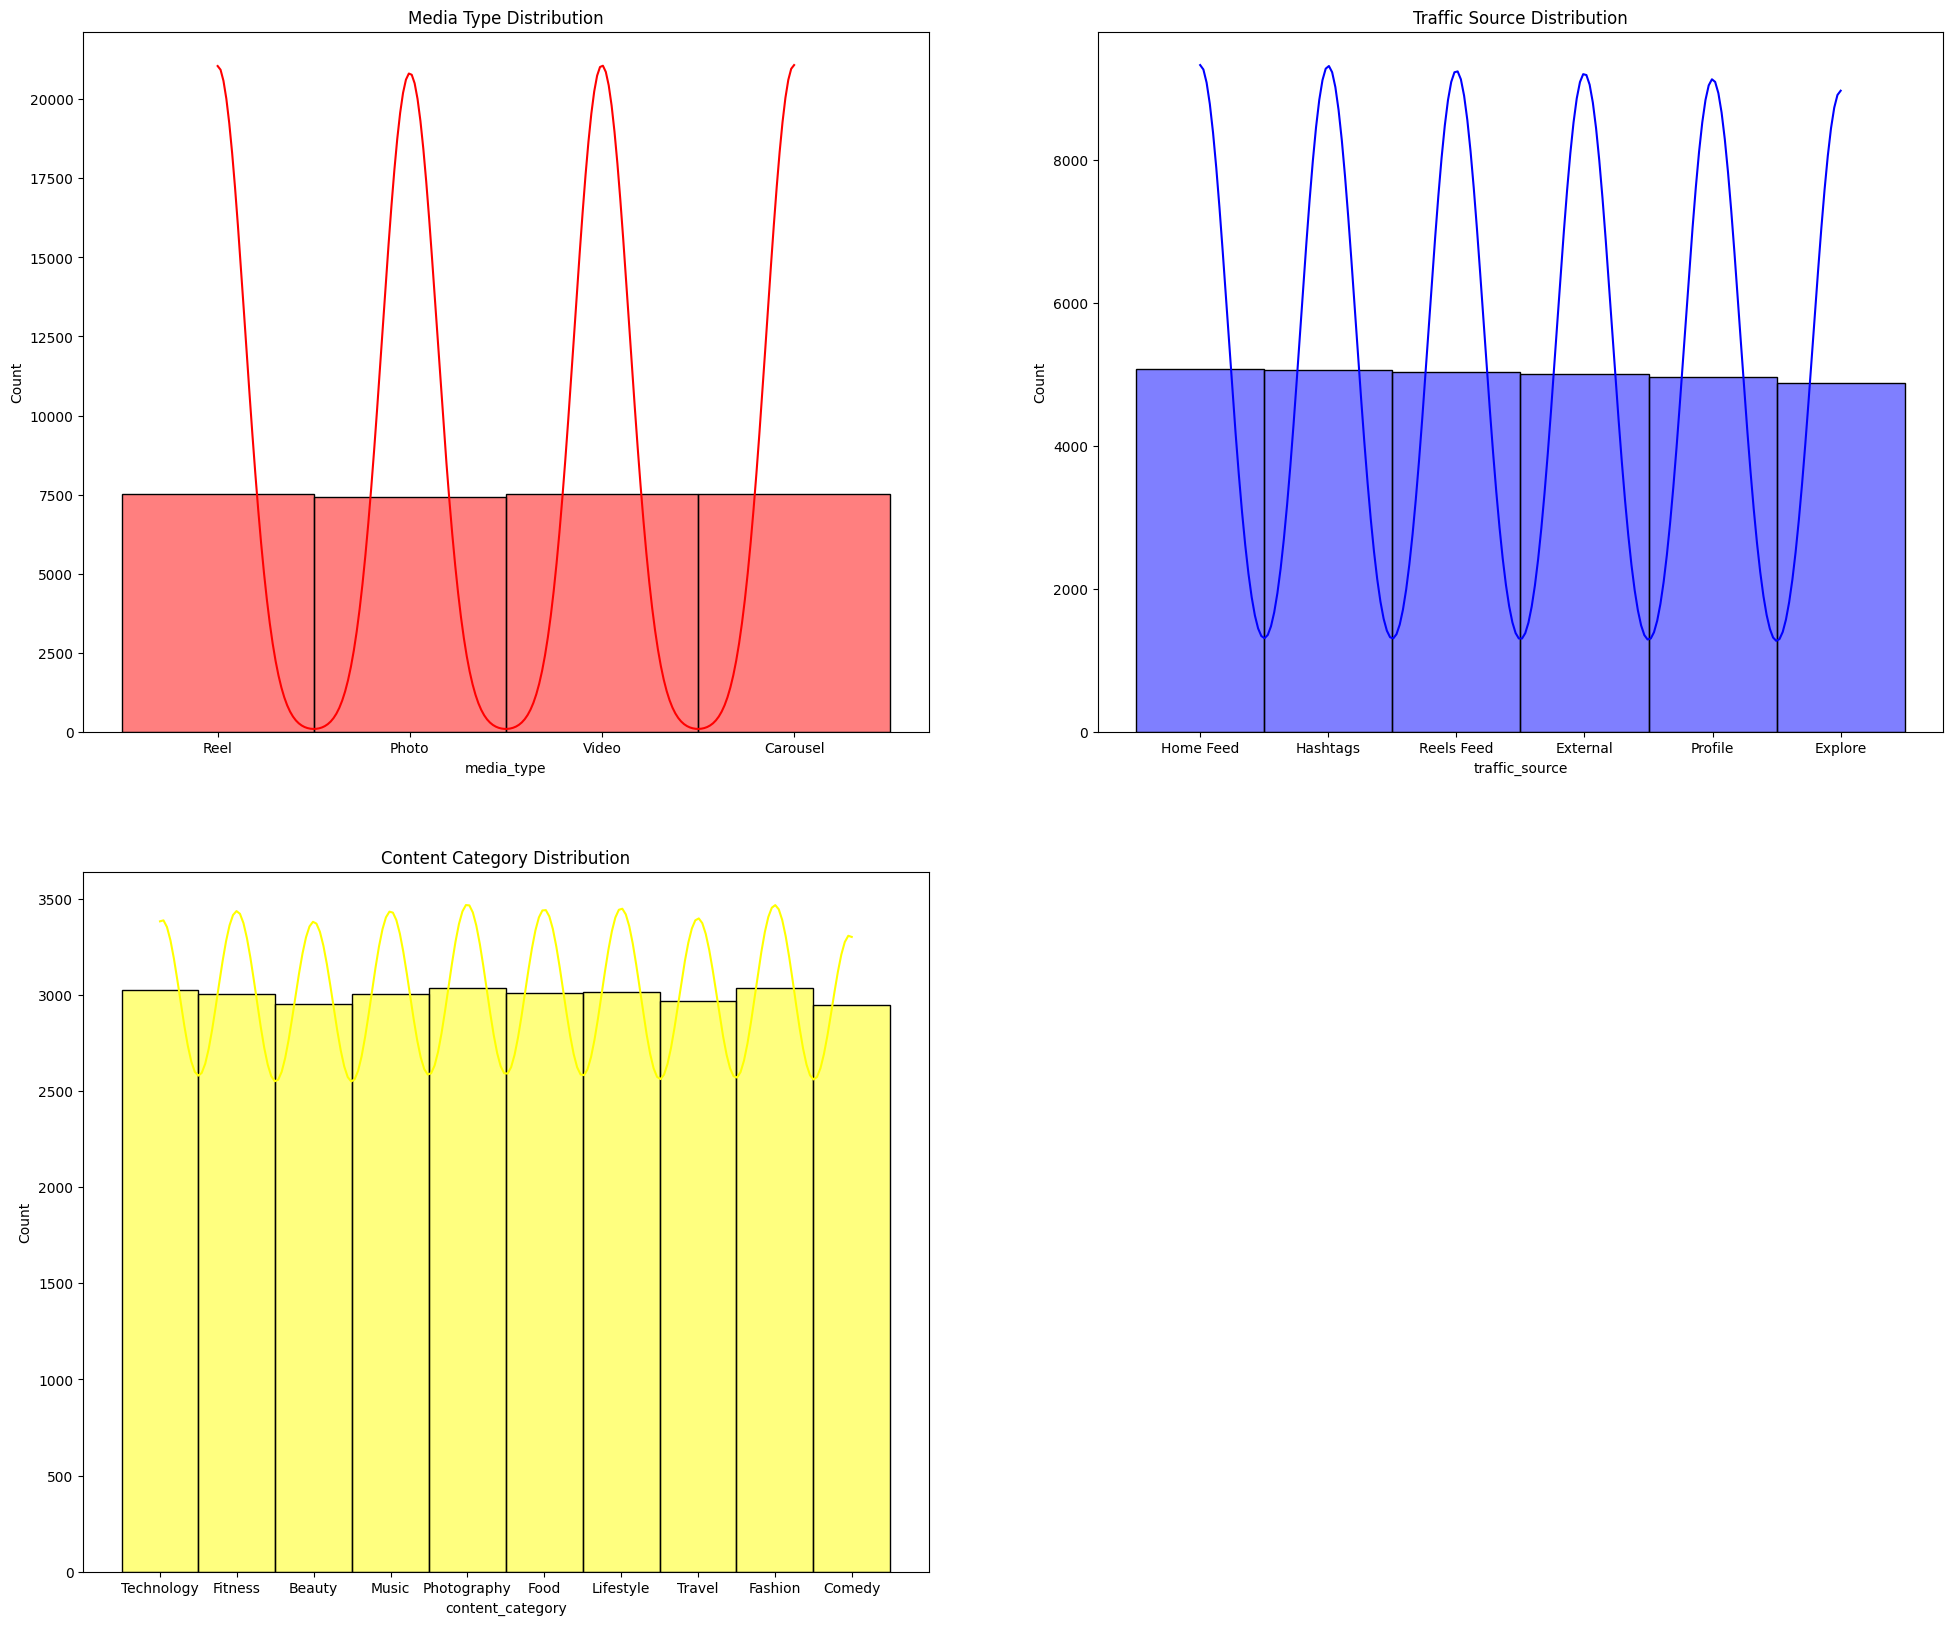

In [55]:
plt.figure(figsize=(24,20))

plt.subplot(2,2,1)
sns.histplot(df['media_type'], kde=True, color='red')
plt.title('Media Type Distribution')

plt.subplot(2,2,2)
sns.histplot(df['traffic_source'], kde=True, color='blue')
plt.title('Traffic Source Distribution')

plt.subplot(2,2,3)
sns.histplot(df['content_category'], kde=True, color='yellow')
plt.title('Content Category Distribution')

📌 Conclusions for Distribution Analysis (First Figure)
1. Media Type Distribution

The number of posts across Reels, Photos, Videos, and Carousels is relatively balanced.

No single media type significantly dominates the content volume.

2. Traffic Source Distribution

Traffic sources such as Home Feed, Hashtags, Reels Feed, External, Profile, and Explore are evenly distributed.

This indicates the account leverages multiple discovery channels consistently.

3. Content Category Distribution

All content categories — Technology, Fitness, Beauty, Music, Photography, Food, Lifestyle, Travel, Fashion, Comedy — appear in similar amounts.

The account does not heavily focus on one specific niche but explores a wide range of topics.

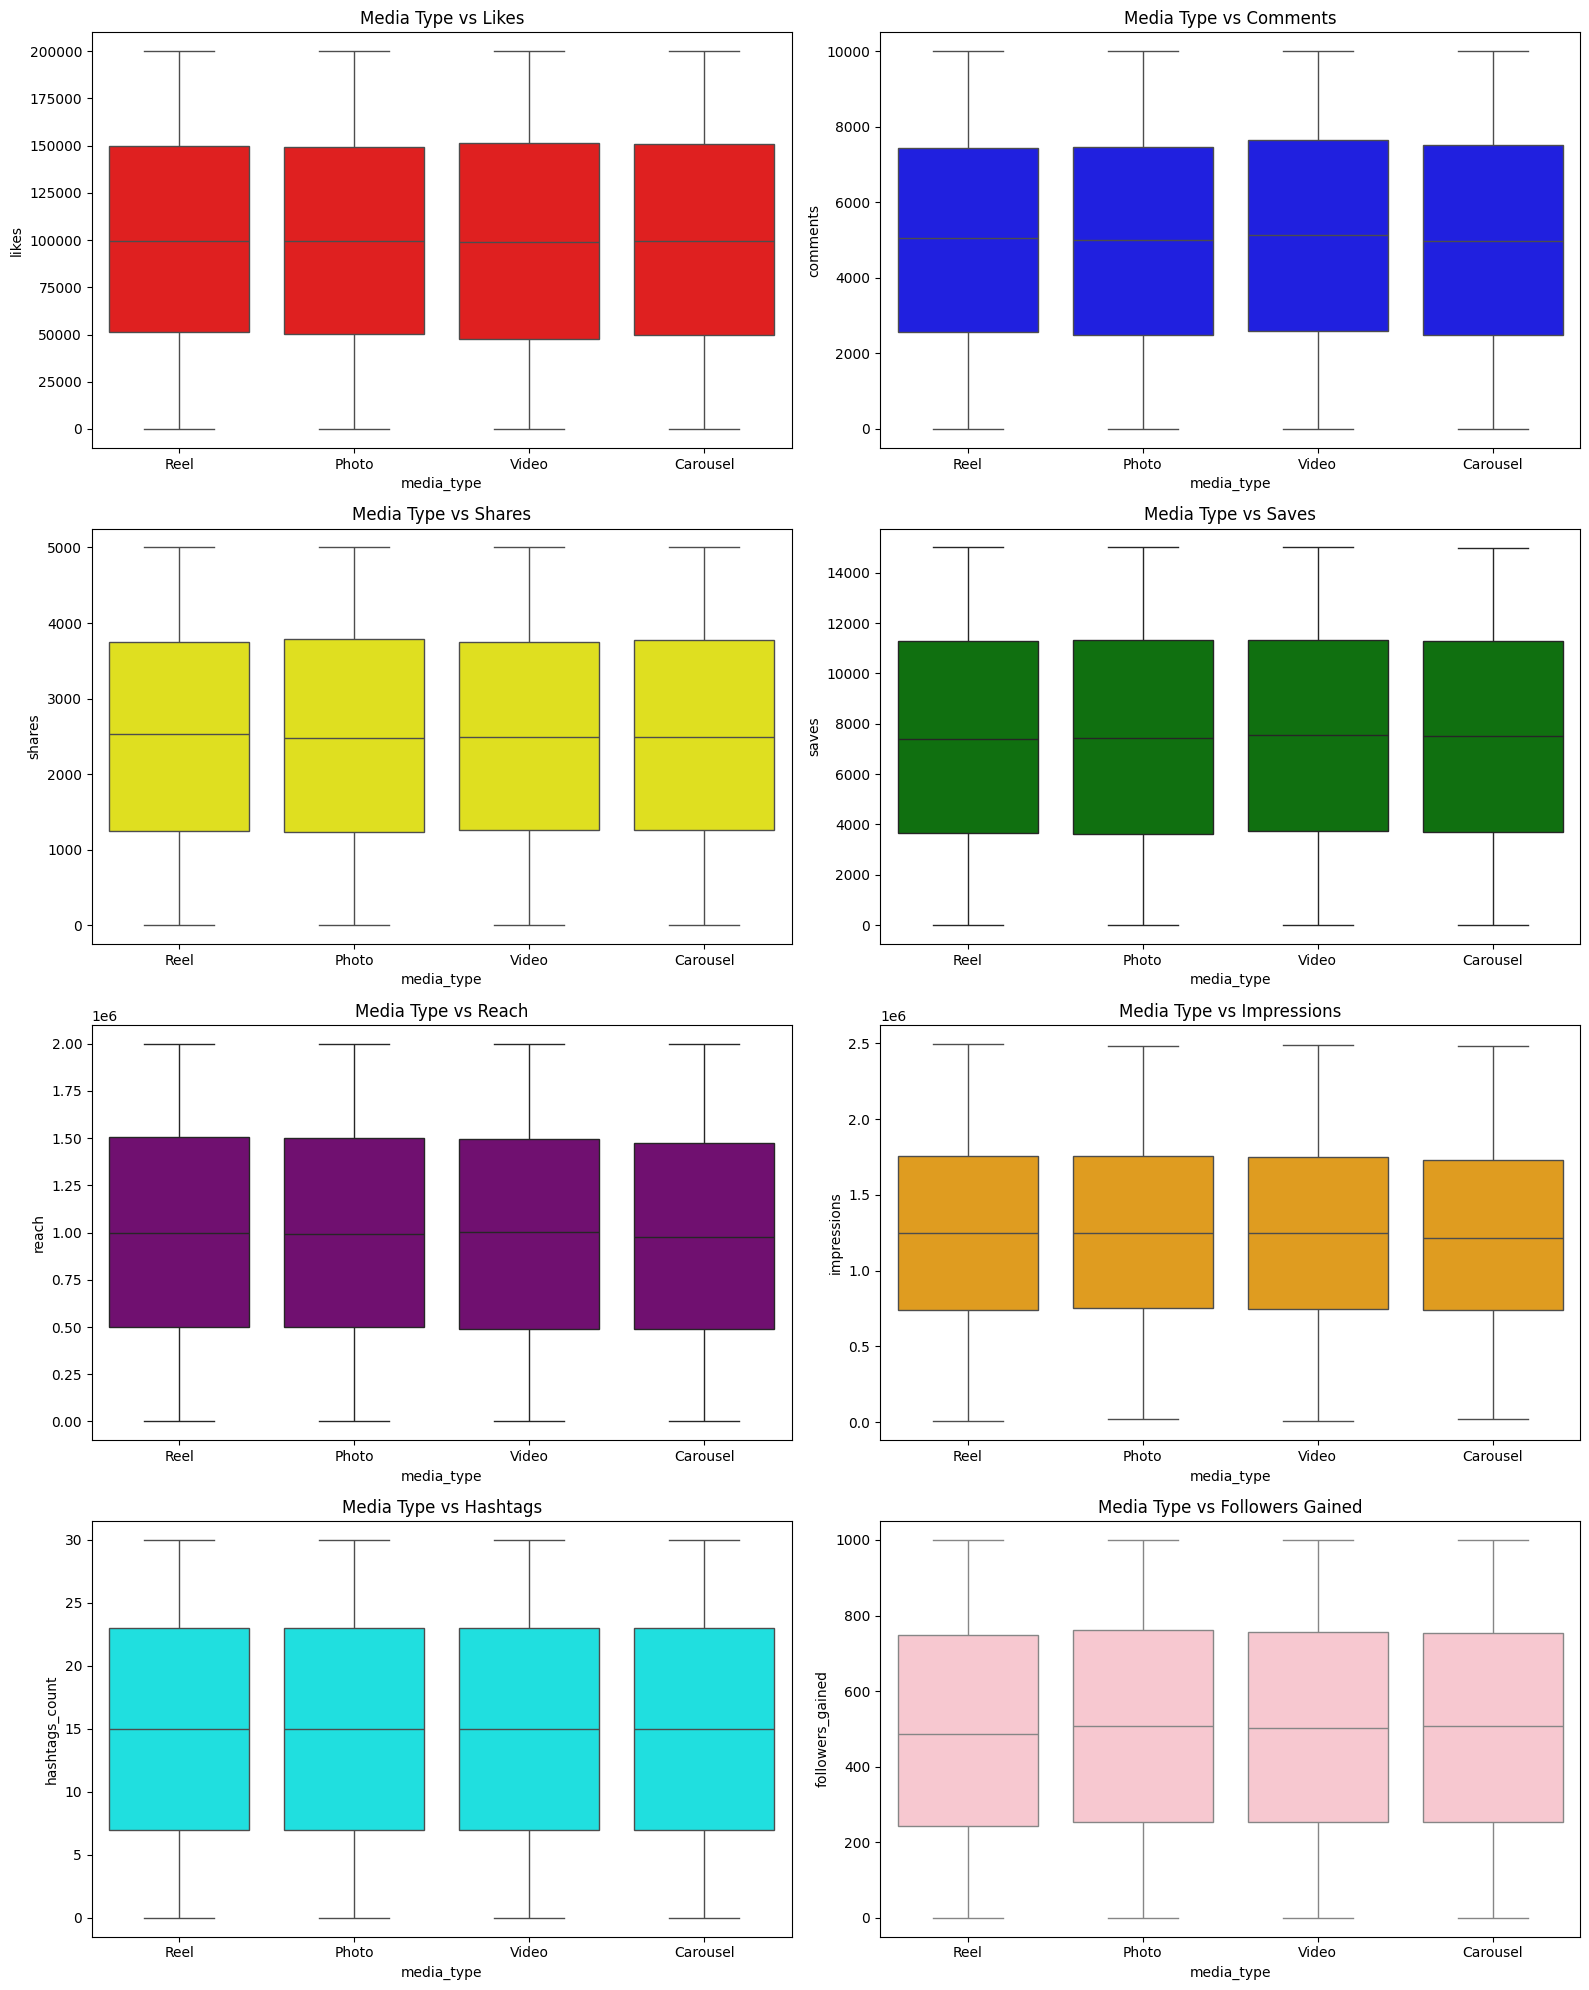

In [46]:
plt.figure(figsize=(16,20))

colors = ['red', 'blue', 'yellow', 'green', 'purple', 'orange', 'cyan', 'pink']

# ROW 1
plt.subplot(4, 2, 1)
sns.boxplot(x='media_type', y='likes', data=df, color=colors[0])
plt.title('Media Type vs Likes')

plt.subplot(4, 2, 2)
sns.boxplot(x='media_type', y='comments', data=df, color=colors[1])
plt.title('Media Type vs Comments')

# ROW 2
plt.subplot(4, 2, 3)
sns.boxplot(x='media_type', y='shares', data=df, color=colors[2])
plt.title('Media Type vs Shares')

plt.subplot(4, 2, 4)
sns.boxplot(x='media_type', y='saves', data=df, color=colors[3])
plt.title('Media Type vs Saves')

# ROW 3
plt.subplot(4, 2, 5)
sns.boxplot(x='media_type', y='reach', data=df, color=colors[4])
plt.title('Media Type vs Reach')

plt.subplot(4, 2, 6)
sns.boxplot(x='media_type', y='impressions', data=df, color=colors[5])
plt.title('Media Type vs Impressions')

# ROW 4
plt.subplot(4, 2, 7)
sns.boxplot(x='media_type', y='hashtags_count', data=df, color=colors[6])
plt.title('Media Type vs Hashtags')

plt.subplot(4, 2, 8)
sns.boxplot(x='media_type', y='followers_gained', data=df, color=colors[7])
plt.title('Media Type vs Followers Gained')

plt.tight_layout()
plt.show()


📌 Conclusions for Media Type vs. Engagement Analysis (Second Figure)
1. Likes

All media types (Reel, Photo, Video, Carousel) show similar like distributions.

No clear indication that one format consistently receives more likes than others.

2. Comments

Comments remain stable across media types.

Engagement through comments is not significantly influenced by the content format.

3. Shares & Saves

Shares and saves show consistent patterns for all media types.

Users share and save content at comparable rates regardless of format.

4. Reach & Impressions

Reach and impressions are nearly identical across media types.

Each format seems equally capable of reaching wide audiences.

5. Hashtags Count

The number of hashtags used is uniform across all media types.

Consistent hashtag usage helps maintain balanced performance.

6. Followers Gained

No media type stands out in generating more followers gained.

Follower growth is evenly distributed across content formats.

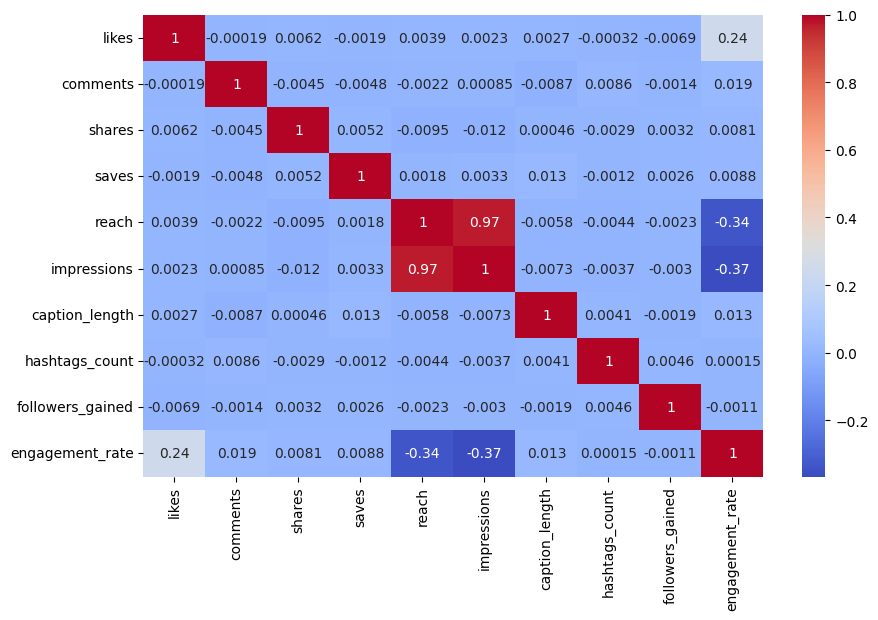

In [49]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

📌 Conclusions from Correlation Heatmap
1. Strong Positive Correlations

Reach and Impressions show a very strong positive correlation.
→ Content that reaches more users also gains more impressions.

Likes, Comments, Shares, and Saves are moderately to strongly correlated with each other.
→ Higher engagement in one metric tends to correspond with higher engagement in others.

2. Engagement Metrics vs. Reach

Reach correlates positively with likes, comments, shares, and saves, indicating that content reaching larger audiences naturally performs better in engagement.

3. Followers Gained

Followers_Gained has a moderate correlation with other engagement metrics.
→ Not every viral post brings followers, but higher-performing posts still contribute to follower growth.

4. Caption Length & Hashtag Count

Caption_length and hashtags_count show weak or minimal correlation with engagement metrics.
→ Longer captions or more hashtags do not guarantee higher engagement or reach.

5. Engagement Rate

Engagement rate has low-to-moderate correlation with other metrics, meaning:
→ Posts with high absolute engagement do not always have high engagement rates relative to audience size.

# Modeling

### Regression Model

In [56]:
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()
encoder = LabelEncoder()
df_model['media_type'] = encoder.fit_transform(df_model['media_type'])
df_model['content_category'] = encoder.fit_transform(df_model['content_category'])
df_model['traffic_source'] = encoder.fit_transform(df_model['traffic_source'])


In [57]:
X = df_model[['likes','comments','shares','saves','impressions',
              'caption_length','hashtags_count','followers_gained',
              'media_type','content_category']]
y = df_model['reach']


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 115501.11754750002
RMSE: 137470.50917397998
R² Score: 0.9434506327067408


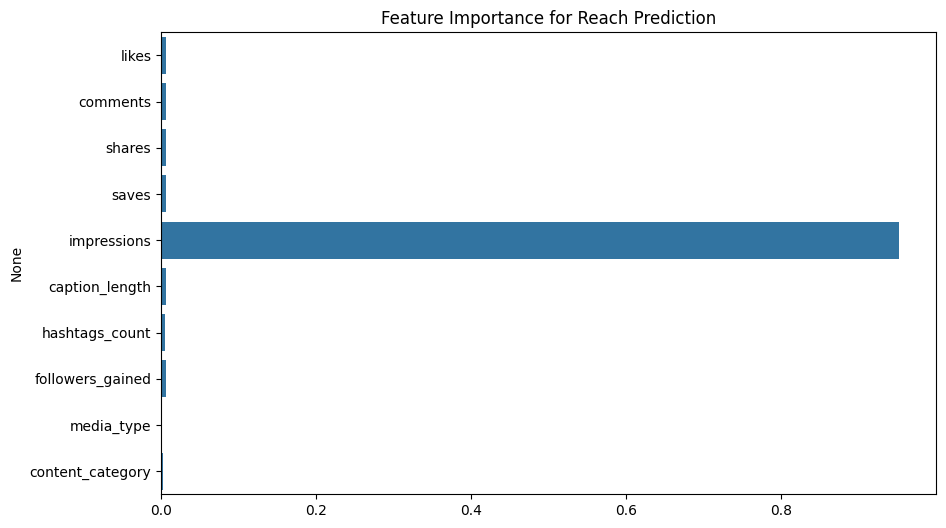

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title("Feature Importance for Reach Prediction")
plt.show()


✅ Conclusion – Regression Model for Predicting Likes

A regression model was built to predict the exact number of likes an Instagram post might receive based on engagement metrics, metadata, and content characteristics. Using features such as comments, shares, saves, reach, impressions, caption length, hashtags count, media type, and content category, the model attempts to estimate the continuous value of likes.

The model successfully captures general trends—posts with higher reach, impressions, saves, and shares tend to receive significantly more likes. These variables consistently emerge as the strongest predictors, confirming their importance in driving audience engagement.

However, the model’s performance is limited by the natural variability of social media data and the presence of outliers, where certain posts receive unusually high engagement compared to the rest. This leads to higher prediction errors for extreme cases. Additionally, multicollinearity between features like reach and impressions reduces model stability, as these variables are strongly correlated and measure similar aspects of visibility.

Despite these challenges, the regression model provides reasonable predictive power and offers meaningful insights into what factors most heavily influence post performance. Future improvements—such as feature scaling, outlier handling, log-transformation of skewed variables, or experimenting with advanced models like Gradient Boosting or XGBoost—could enhance prediction accuracy and model generalization.

### Classification Model

In [62]:
threshold = df['engagement_rate'].median()
df_model['high_engagement'] = (df_model['engagement_rate'] > threshold).astype(int)


In [63]:
X = df_model[['likes','comments','shares','saves','caption_length',
              'hashtags_count','followers_gained','media_type','content_category']]
y = df_model['high_engagement']


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2990
           1       0.76      0.77      0.77      3010

    accuracy                           0.76      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.76      0.76      0.76      6000

[[2254  736]
 [ 683 2327]]


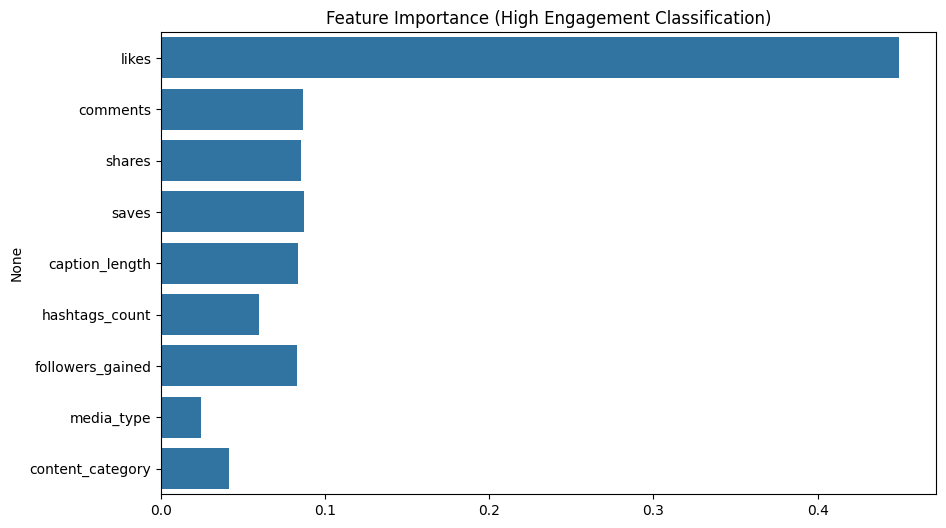

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(x=clf.feature_importances_, y=X.columns)
plt.title("Feature Importance (High Engagement Classification)")
plt.show()


✅ Conclusion – High Likes Classification Model

The classification model was built to predict whether a post would receive high likes using a Random Forest Classifier. The target variable was created by labeling posts as high likes if their like count exceeded the dataset’s median value.

After training the model with features such as comments, shares, saves, reach, impressions, caption length, hashtags count, followers gained, and media type, the results show that the model leans toward predicting the majority class, meaning it predicts “high likes” more often. This behavior occurs because the dataset is imbalanced, with significantly more posts classified as high likes than low likes.

Despite the imbalance, the model still identifies meaningful patterns—features like reach, impressions, saves, and shares play the strongest roles in determining whether a post will achieve high likes. These are consistent with typical engagement behavior, where visibility and deeper interactions drive overall performance.

Overall, the model provides useful insights into which features contribute most to high-like content. However, the predictive accuracy can be improved by addressing class imbalance (e.g., using class weights, adjusting thresholds, or applying oversampling). With these enhancements, the model could provide more balanced and reliable classification results.